# Tucson Crossing: Guatemala
- Four SSP Scenarios
- Saving output DF and Graphs

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Imputting libraries
from sklearn.linear_model import LinearRegression

# Saving Model Summaries
import statsmodels.api as sm

# Formatting printing and floats
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

# Parsing into a dataframe
wide_df = pd.read_csv('INPUTS_OUTPUTS_NEW_VARIABLES_ML/INPUT_DATA_SCRIPT_ML/Guatemala/GUA_USA_FINAL_VARS.csv')

# Dropping columns
cols_out = ['CSV', 'Country', 'New_Data_Type']
wide_df = wide_df.drop(cols_out, axis=1).copy()

# Cleaning/parsing
wide_df.iloc[:, 4:] = wide_df.iloc[:, 4:].replace(0, np.nan)  # Replacing all 0 values with NaN values
wide_df.iloc[:, 4:] = wide_df.iloc[:, 4:].astype(float)       # Data type to float 

In [2]:
wide_df

,Type_of_Variable,Country_Code,Variable,Unit_of_Measure,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,TRAC,GUA,GUA_Rio_Grande,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,775.00,4089.00,3399.00,4670.00,7313.00,18754.00,37388.00,55202.00,32740.00,38412.00,25553.00,55769.00,68711.00,20058.00,144839.00,35936.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAC,GUA,GUA_Tucson,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,924.00,7587.00,6473.00,8714.00,7862.00,13392.00,14177.00,11627.00,11265.00,12092.00,8782.00,19953.00,24082.00,16830.00,55188.00,22789.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAC,GUA,GUA_San_Diego,Person,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.00,785.00,609.00,613.00,564.00,389.00,381.00,1021.00,1379.00,3088.00,1793.00,6269.00,6949.00,704.00,2617.00,737.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SSP SCENARIO,GUA,GUA_SSP119_avg_temp,Degrees Celsius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.81,23.15,22.60,22.83,21.90,22.14,22.58,23.35,22.61,21.98,22.91,22.83,22.51,22.77,22.33,22.76,23.43,22.22,22.69,22.78,23.39,23.12,22.30,22.55,23.43,22.79,22.90,22.92,22.97,22.93,22.88,22.61,23.01,22.51,22.64,23.05,23.89,23.52,22.97,22.79,22.70,22.09,22.73,22.80,22.59,22.72,22.74,22.98,22.93,22.27,22.34,22.55,22.75,22.76,22.42,23.36,23.07,22.30,22.84,23.33,21.83,22.69,22.73,22.27,22.81,22.98,22.60,22.72,22.90,22.83,22.68,22.80,22.45,21.93,22.54,23.12,22.44,22.84,22.19,23.11,22.90,22.77,22.62,22.73,22.69,22.79
4,SSP SCENARIO,GUA,GUA_SSP245_avg_temp,Degrees Celsius,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.94,22.68,22.80,22.19,22.11,23.26,22.92,22.34,21.81,21.94,22.62,22.90,22.75,22.96,22.91,23.27,23.29,22.42,23.16,22.95,22.18,23.10,22.97,22.85,23.23,22.29,23.30,23.61,23.08,22.81,22.5

In [3]:
# Function to parse data into numeric

def prepare_data(df, year_columns):
    df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')
    return df

# # Function to impute data with OLS

def impute_with_ols(df, train_start_year, train_end_year):
    # Defining columns
    year_columns = [str(year) for year in range(train_start_year, train_end_year + 1)]
    # Imputting data
    for index, row in df.iterrows():
        # Fitting the model only on available data
        available_data = row[year_columns].dropna()
        if len(available_data) < 2:
            continue  # Need at least two data points to fit a line
        
        # Determining imputation method for each variable
        impute_method = {}
        for col in available_data.index:
            if col in ['GDP (current US$)', 'GDP per capita (current US$)', 'Unemployment, total (% of total labor force) (modeled ILO estimate)']:
                impute_method[col] = 'mean'
            else:
                impute_method[col] = 'median'

        # Setting variables for OLS
        X_train = np.array(list(map(int, available_data.index))).reshape(-1, 1)
        y_train = available_data.values
        model = LinearRegression()
        model.fit(X_train, y_train)
        
        # Predicting missing values
        missing_years = row[year_columns][row[year_columns].isna()].index
        if missing_years.empty:
            continue
        X_missing = np.array(list(map(int, missing_years))).reshape(-1, 1)
        predicted_values = model.predict(X_missing)
        
        # Filling missing values in the DataFrame using the appropriate imputation method
        for col in missing_years:
            if col in impute_method:
                if impute_method[col] == 'mean':
                    df.loc[index, col] = row[year_columns].mean()
                elif impute_method[col] == 'median':
                    df.loc[index, col] = row[year_columns].median()

    return df


# Converting year columns to numeric: 1960 - 2100

year_columns = [str(year) for year in range(1960, 2100)]
wide_df = prepare_data(wide_df, year_columns)

In [4]:
wide_df.tail()

,Type_of_Variable,Country_Code,Variable,Unit_of_Measure,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
24,POPULATION VARIABLE,USA,Prevalence of undernourishment (% of population),Share of Population,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3528128.93,3230717.55,2926099.15,2614705.59,2626639.62,2320580.58,2324220.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,POPULATION VARIABLE,USA,Corruption,Counts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15700.00,16200.00,15900.00,15900.00,15967.00,14765.00,13497.00,9393.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,POPULATION VARIABLE,USA,Government Effectiveness: Estimate,Rate (0 to 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.52,NaN,1.70,NaN,1.72,NaN,1.62,1.54,1.74,1.53,1.58,1.64,1.61,1.50,1.55,1.51,1.52,1.52,1.46,1.43,1.44,1.52,1.54,1.45,1.28,1.30,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,ECONOMIC VARIABLE,USA,GDP (current US$),USD,543000000000.00,563000000000.00,605000000000.00,639000000000.00,686000000000.00,744000000000.00,815000000000.00,862000000000.00,943000000000.00,1020000000000.00,1070000000000.00,1160000000000.00,1280000000000.00,1430000000000.00,1550000000000.00,1680000000000.00,1870000000000.00,2080000000000.00,2350000000000.00,2630000000000.00,2860000000000.00,3210000000000.00,3340000000000.00,3630000000000.00,4040000000000.00,4340000000000.00,4580000000000.00,4860000000000.00,5240000000000.00,5640000000000.00,5960000000000.00,6160000000000.00,6520000000000.00,6860000000000.00,7290000000000.00,7640000000000.00,8070000000000.00,8580000000000.00,9060000000000.00,9630000000000.00,10300000000000.00,10600000000000.00,10900000000000.00,11500000000000.00,12200000000000.00,13000000000000.00,13800000000000.00,14500000000000.00,14800000000000.00,14500000000000.00,15000000000000.00,15600000000000.00,16300000000000.00,16800000000000.00,17600000000000.00,18200000000000.00,18700000000000.00,19500000000000.00,20500000000000.00,21400000000000.00,21100000000000.00,23300000000000.00,25400000000000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# OLS : 2015 TO 2022

# Perform imputation with OLS for specified years
wide_df_processed_data_ols = impute_with_ols(wide_df, 2015, 2022)
wide_df_processed_data_ols = wide_df_processed_data_ols

# Dropping columns
years_to_drop = [str(year) for year in range(1960, 2015)]
wide_df_processed_data_ols = wide_df_processed_data_ols.drop(columns=years_to_drop)
# wide_df_processed_data_ols.head()

In [6]:
# Function to parse data into numeric

def convert_to_numeric(df):
    for col in df.columns:
        try:
            # Force convert to float and handle exceptions
            df[col] = pd.to_numeric(df[col], errors='raise')
        except ValueError as e:
            # Log columns that could not be converted, with error message
            print(f"Column {col} cannot be converted to numeric: {e}")
        except Exception as e:
            # Log unexpected exceptions
            print(f"Unexpected error with column {col}: {e}")
    return df

# Function for Linear Interpolation

def linear_interpolation2(df, start_year, end_year):
    # Create a list of year columns
    year_columns = [str(year) for year in range(start_year, end_year + 1)]
    # Filter out columns that are not in the year range
    year_columns = [col for col in year_columns if col in df.columns]

    # Convert all potential year columns to numeric
    df[year_columns] = convert_to_numeric(df[year_columns])

    # Apply linear interpolation to only the year columns
    df[year_columns] = df[year_columns].interpolate(method='linear', axis=1, limit_direction='both')

    return df

# Calling function with specified years

wide_df_processed_data_ols = linear_interpolation2(wide_df_processed_data_ols, 1960, 2022)
# wide_df_processed_data_ols

/var/folders/n9/h_xmdzn54836zt3_ch46ywdm0000gn/T/ipykernel_11578/4089097305.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='raise')


In [7]:
# wide_df_processed_data_ols['Type__of_Variable'][7:]

In [8]:
# Melting the dataframe

long_df = pd.melt(wide_df_processed_data_ols, id_vars=['Country_Code', 'Variable', 
                                                       'Unit_of_Measure', 'Type_of_Variable'],
                                                         var_name='Year', value_name='Value')

# Printing melted dataframe 
long_df['Year'] = long_df['Year'].astype(int) 
long_df_22to100 = long_df[long_df['Year'] >= 2021]

In [9]:
long_df.head(100)

,Country_Code,Variable,Unit_of_Measure,Type_of_Variable,Year,Value
0,GUA,GUA_Rio_Grande,Person,TRAC,2015,32740.00
1,GUA,GUA_Tucson,Person,TRAC,2015,11265.00
2,GUA,GUA_San_Diego,Person,TRAC,2015,1379.00
3,GUA,GUA_SSP119_avg_temp,Degrees Celsius,SSP SCENARIO,2015,21.81
4,GUA,GUA_SSP245_avg_temp,Degrees Celsius,SSP SCENARIO,2015,21.94
5,GUA,GUA_SSP370_avg_temp,Degrees Celsius,SSP SCENARIO,2015,21.89
6,GUA,GUA_SSP585_avg_temp,Degrees Celsius,SSP SCENARIO,2015,21.73
7,GUA,"Population, total",Person,POPULATION VARIABLE,2015,15567419.00
8,GUA,Rural population (% of total population),Share of Population,POPULATION VARIABLE,2015,7788224.05
9,GUA,Population ages 15-64 (% of total population),Share of Population,POPULATION VARIABLE,2015,9250085.67


In [10]:
# Libraries

import statsmodels.api as sm
# from sklearn.datasets import load_iris 
from math import log
import statsmodels.api as sm
# from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Filter data for temperature projections and historical data

# Historical Data from 1960 to 2022
historical_data = long_df[long_df['Year'] <= 2022]
# Predicted Data from 2022 to 2100
predicted_data = long_df[long_df['Year'] >= 2023]

In [11]:
##################################################################

# Scenario 1: GUA_SSP119_avg_temp
# features_1960_2022_ssp119

# Creating a dataframe 'features_1960_2022_ssp119' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'GUA_SSP119_avg_temp'
GUA_features_1960_2022_ssp119 = historical_data[historical_data['Variable'] == 'GUA_SSP119_avg_temp'] 
GUA_features_1960_2022_ssp119 = GUA_features_1960_2022_ssp119[['Year', 'Value']]                            
GUA_features_1960_2022_ssp119 = GUA_features_1960_2022_ssp119.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 2: GUA_SSP245_avg_temp
# features_1960_2022_ssp245

# Creating a dataframe 'features_1960_2022_ssp245' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'GUA_SSP245_avg_temp'
GUA_features_1960_2022_ssp245 = historical_data[historical_data['Variable'] == 'GUA_SSP245_avg_temp'] 
GUA_features_1960_2022_ssp245 = GUA_features_1960_2022_ssp245[['Year', 'Value']]                            
GUA_features_1960_2022_ssp245 = GUA_features_1960_2022_ssp245.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 3: GUA_SSP370_avg_temp
# features_1960_2022_ssp370

# Creating a dataframe 'features_1960_2022_ssp370' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'GUA_SSP245_avg_temp'
GUA_features_1960_2022_ssp370 = historical_data[historical_data['Variable'] == 'GUA_SSP370_avg_temp'] 
GUA_features_1960_2022_ssp370 = GUA_features_1960_2022_ssp370[['Year', 'Value']]                            
GUA_features_1960_2022_ssp370 = GUA_features_1960_2022_ssp370.rename(columns={'Value': 'Temperature'})      

##################################################################

# Scenario 4: GUA_SSP585_avg_temp
# features_1960_2022_ssp585

# Creating a dataframe 'features_1960_2022_ssp585' 
# Years 1960 to 2022
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'features_ssp119' = X

# Filtering data for 'GUA_SSP585_avg_temp'
GUA_features_1960_2022_ssp585 = historical_data[historical_data['Variable'] == 'GUA_SSP585_avg_temp'] 
GUA_features_1960_2022_ssp585 = GUA_features_1960_2022_ssp585[['Year', 'Value']]                            
GUA_features_1960_2022_ssp585 = GUA_features_1960_2022_ssp585.rename(columns={'Value': 'Temperature'})      

##################################################################

# Additional Variables to all models
# additional_variables: not considering SSP and TRAC data: X
additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)'
]
    
##################################################################

##################################################################

# Scenario 1: _SSP119_avg_temp
# features_1960_2022_ssp119
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_features_1960_2022_ssp119 = pd.merge(GUA_features_1960_2022_ssp119, var_data, on='Year', how='outer') 
    
# features_1960_2022_ssp119.tail() 
##################################################################

# Scenario 2: _SSP245_avg_temp
# features_1960_2022_ssp245
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_features_1960_2022_ssp245 = pd.merge(GUA_features_1960_2022_ssp245, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!
    
# features_1960_2022_ssp245.tail() 
##################################################################

# Scenario 3: _SSP370_avg_temp
# features_1960_2022_ssp370
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_features_1960_2022_ssp370 = pd.merge(GUA_features_1960_2022_ssp370, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!
    
# features_1960_2022_ssp370.tail() 
##################################################################

# Scenario 4: _SSP585_avg_temp
# features_1960_2022_ssp585
# Getting all values from additional_variables into features
for var in additional_variables:
    var_data = historical_data[historical_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_features_1960_2022_ssp585 = pd.merge(GUA_features_1960_2022_ssp585, var_data, on='Year', how='outer') #CHANGE!!!!!!!!!!!

# features_1960_2022_ssp585.head() 

In [12]:
# GUA_features_1960_2022_ssp119

In [13]:
# Libraries 

from sklearn.linear_model import Ridge
from sklearn.multioutput import MultiOutputRegressor

In [14]:
# Historic data on temperature
X1_119_GUA = GUA_features_1960_2022_ssp119[['Temperature']]         
# Predictions on training data based on temperature
Y1_119_GUA = GUA_features_1960_2022_ssp119.drop(columns='Temperature')      
# Training model with Ridge Regression for 'GUA_SSP119_avg_temp' based on 'Temperature'
model119_GUA = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_119_GUA, Y1_119_GUA)

In [15]:
# Y1_119_GUA.shape    # Y1_119_GUA.shape # (32768, 14)
# X1_119_GUA.shape # Y1_119_GUA.shape # (32768, 1)
Y1_119_GUA.tail()

,Year,"Population, total",Rural population (% of total population),Population ages 15-64 (% of total population),"Unemployment, total (% of total labor force) (modeled ILO estimate)",Victims of intentional homicide,Prevalence of severe food insecurity in the population (%),Prevalence of undernourishment (% of population),Corruption,Government Effectiveness: Estimate,GDP (current US$),GDP per capita (current US$)
16379,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,-0.91,25400000000000.00,76329.58
16380,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,95003330316.00,5473.21
16381,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,95003330316.00,76329.58
16382,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,25400000000000.00,5473.21
16383,2022,333287557.00,56378923.14,56378923.14,2056703.12,21593.00,2324220.88,2324220.88,9393.00,1.26,25400000000000.00,76329.58


In [16]:
model119_GUA

MultiOutputRegressor(estimator=Ridge(random_state=123))

In [17]:
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: GUA_Tucson #########
# X1 and Y1 are based on features_ssp119 which was filtered with 'GUA_SSP119_avg_temp'

# Historic data on temperature
X1_119_GUA = GUA_features_1960_2022_ssp119[['Temperature']]         
# Predictions on training data based on temperature
Y1_119_GUA = GUA_features_1960_2022_ssp119.drop(columns='Temperature')      
# Training model with Ridge Regression for 'GUA_SSP119_avg_temp' based on 'Temperature'
model119_GUA = MultiOutputRegressor(Ridge(random_state=123)).fit(X1_119_GUA, Y1_119_GUA)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: GUA_Tucson #########
# X1 and Y1 are based on features_ssp245 which was filtered with 'GUA_SSP245_avg_temp'

# Historic data on temperature
X2_245_GUA = GUA_features_1960_2022_ssp245[['Temperature']]         
# Predictions on training data based on temperature
Y2_245_GUA = GUA_features_1960_2022_ssp245.drop(columns='Temperature')      
# Training model with Ridge Regression for 'GUA_SSP119_avg_temp' based on 'Temperature'
model245_GUA = MultiOutputRegressor(Ridge(random_state=123)).fit(X2_245_GUA, Y2_245_GUA)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: GUA_Tucson #########
# X1 and Y1 are based on features_ssp370 which was filtered with 'GUA_SSP370_avg_temp'

# Historic data on temperature
X3_370_GUA = GUA_features_1960_2022_ssp370[['Temperature']]         
# Predictions on training data based on temperature
Y3_370_GUA = GUA_features_1960_2022_ssp370.drop(columns='Temperature')      
# Training model with Ridge Regression for 'GUA_SSP119_avg_temp' based on 'Temperature'
model370_GUA = MultiOutputRegressor(Ridge(random_state=123)).fit(X3_370_GUA, Y3_370_GUA)

##################################################################
##################################################################
# Training Data: training all features based on temperature

######### Crossing 1: GUA_Tucson #########
# X1 and Y1 are based on features_ssp585 which was filtered with 'GUA_SSP585_avg_temp'

# Historic data on temperature
X4_585_GUA = GUA_features_1960_2022_ssp585[['Temperature']]         
# Predictions on training data based on temperature
Y4_585_GUA = GUA_features_1960_2022_ssp585.drop(columns='Temperature')      
# Training model with Ridge Regression for 'GUA_SSP119_avg_temp' based on 'Temperature'
model585_GUA = MultiOutputRegressor(Ridge(random_state=123)).fit(X4_585_GUA, Y4_585_GUA)

##################################################################

In [18]:
# Prediction Dataframe: 2023 to 2100 (predicted_data)
##################################################################

# Additional Variables to all models
# additional_variables: not considering SSP and TRAC data: X
#####

additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)'
]

#####


# Scenario 1: _SSP119_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp119' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp119' = X
#####
# Filtering data for 'GUA_SSP119_avg_temp'
GUA_new_features_2023_2100_ssp119 = predicted_data[predicted_data['Variable'] == 'GUA_SSP119_avg_temp']
GUA_new_features_2023_2100_ssp119 = GUA_new_features_2023_2100_ssp119[['Year', 'Value']]  
GUA_new_features_2023_2100_ssp119 = GUA_new_features_2023_2100_ssp119.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP119_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_new_features_2023_2100_ssp119 = pd.merge(GUA_new_features_2023_2100_ssp119, var_data, on='Year', how='outer')
##################################################################


# Scenario 2: _SSP245_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp245' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp245' = X
#####
# Filtering data for 'GUA_SSP245_avg_temp'
GUA_new_features_2023_2100_ssp245 = predicted_data[predicted_data['Variable'] == 'GUA_SSP245_avg_temp']
GUA_new_features_2023_2100_ssp245 = GUA_new_features_2023_2100_ssp245[['Year', 'Value']]  
GUA_new_features_2023_2100_ssp245 = GUA_new_features_2023_2100_ssp245.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP245_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_new_features_2023_2100_ssp245 = pd.merge(GUA_new_features_2023_2100_ssp245, var_data, on='Year', how='outer')
##################################################################


# Scenario 3: _SSP370_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp370' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp370' = X

# Filtering data for 'GUA_SSP370_avg_temp'
GUA_new_features_2023_2100_ssp370 = predicted_data[predicted_data['Variable'] == 'GUA_SSP370_avg_temp']
GUA_new_features_2023_2100_ssp370 = GUA_new_features_2023_2100_ssp370[['Year', 'Value']]  
GUA_new_features_2023_2100_ssp370 = GUA_new_features_2023_2100_ssp370.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP370_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_new_features_2023_2100_ssp370 = pd.merge(GUA_new_features_2023_2100_ssp370, var_data, on='Year', how='outer')
##################################################################


# Scenario 4: _SSP585_avg_temp = Y
##################################################################
# Creating a dataframe 'new_features_2023_2100_ssp585' 
# Years 2023 to 2100
# 'features_ssp119' stores all values from all variables except SSP and TRAC data
# 'new_features_2023_2100_ssp585' = X

# Filtering data for 'GUA_SSP585_avg_temp'
GUA_new_features_2023_2100_ssp585 = predicted_data[predicted_data['Variable'] == 'GUA_SSP585_avg_temp']
GUA_new_features_2023_2100_ssp585 = GUA_new_features_2023_2100_ssp585[['Year', 'Value']]  
GUA_new_features_2023_2100_ssp585 = GUA_new_features_2023_2100_ssp585.rename(columns={'Value': 'Temperature'})  
#####
# Loop through each additional variable and merge with X1 DataFrame
# _SSP585_avg_temp
for var in additional_variables:
    var_data = predicted_data[predicted_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    GUA_new_features_2023_2100_ssp585 = pd.merge(GUA_new_features_2023_2100_ssp585, var_data, on='Year', how='outer')

In [19]:
# Predicting all NaN values of the additional_variables

##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp119
X2_119_GUA = GUA_new_features_2023_2100_ssp119[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_119_GUA = model119_GUA.predict(X2_119_GUA)[:,1:]
# The additional_variables are now getting the predicted Y2 values
GUA_new_features_2023_2100_ssp119[additional_variables] = Y2_119_GUA
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp245
X2_245_GUA = GUA_new_features_2023_2100_ssp245[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_245_GUA = model245_GUA.predict(X2_245_GUA)[:,1:]
# The additional_variables are now getting the predicted Y2 values
GUA_new_features_2023_2100_ssp245[additional_variables] = Y2_245_GUA
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp370
X2_370_GUA = GUA_new_features_2023_2100_ssp370[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_370_GUA = model370_GUA.predict(X2_370_GUA)[:,1:]
# The additional_variables are now getting the predicted Y2 values
GUA_new_features_2023_2100_ssp370[additional_variables] = Y2_370_GUA
##################################################################
# X2 is getting just the temperature values
# new_features_2023_2100_ssp585
X2_585_GUA = GUA_new_features_2023_2100_ssp585[['Temperature']]
# Here the model is predicting all values and storing them in Y2
Y2_585_GUA = model585_GUA.predict(X2_585_GUA)[:,1:]
# The additional_variables are now getting the predicted Y2 values
GUA_new_features_2023_2100_ssp585[additional_variables] = Y2_585_GUA

# Predicting TRAC from all features

In [20]:
# Filter data for temperature projections and historical data

# Prediction starts from 2015 because TRAC starts on 2015
# long_df goes from 2015 to 2100

# Temperature Data from 2023 to 2100, all four SSPs

# Historical Data from 2015 to 2022
long_hist_data = long_df[long_df['Year'] <= 2022]
# Predicted Data from 2023 to 2100
long_predicted_data = long_df[long_df['Year'] >= 2023]
# Dependent Variables, TRAC Crossings
dep_vars = long_hist_data[long_hist_data['Variable'].isin(['GUA_Rio_Grande', 'GUA_Tucson', 'GUA_Tucson'])]

In [21]:
##################################################################
# Filter data for 'GUA_SSP119_avg_temp'

X1_119_GUA = long_hist_data[long_hist_data['Variable'] == 'GUA_SSP119_avg_temp']
X1_119_GUA = X1_119_GUA[['Year', 'Value']]
X1_119_GUA = X1_119_GUA.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'GUA_SSP245_avg_temp'

X1_245_GUA = long_hist_data[long_hist_data['Variable'] == 'GUA_SSP245_avg_temp']
X1_245_GUA = X1_245_GUA[['Year', 'Value']]
X1_245_GUA = X1_245_GUA.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'GUA_SSP370_avg_temp'

X1_370_GUA = long_hist_data[long_hist_data['Variable'] == 'GUA_SSP370_avg_temp']
X1_370_GUA = X1_370_GUA[['Year', 'Value']]
X1_370_GUA = X1_370_GUA.rename(columns={'Value': 'Temperature'})
##################################################################
# Filter data for 'GUA_SSP585_avg_temp'

X1_585_GUA = long_hist_data[long_hist_data['Variable'] == 'GUA_SSP585_avg_temp']
X1_585_GUA = X1_585_GUA[['Year', 'Value']]
X1_585_GUA = X1_585_GUA.rename(columns={'Value': 'Temperature'})
##################################################################

# List of additional variables to add to X1

additional_variables = [
    'Population, total',
    'Rural population (% of total population)',
    'Population ages 15-64 (% of total population)',
    'Unemployment, total (% of total labor force) (modeled ILO estimate)',
    'Victims of intentional homicide',
    'Prevalence of severe food insecurity in the population (%)',
    'Prevalence of undernourishment (% of population)',
    'Corruption',
    'Government Effectiveness: Estimate',
    'GDP (current US$)',
    'GDP per capita (current US$)',
    'GUA_Tucson'
]


##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_119_GUA = pd.merge(X1_119_GUA, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_245_GUA = pd.merge(X1_245_GUA, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_370_GUA = pd.merge(X1_370_GUA, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year
# 2015 to 2022
##################################################################
# Loop through each additional variable and merge with X1 DataFrame
for var in additional_variables:
    var_data = long_hist_data[long_hist_data['Variable'] == var][['Year', 'Value']]
    var_data = var_data.rename(columns={'Value': var})
    X1_585_GUA = pd.merge(X1_585_GUA, var_data, on='Year', how='outer')
# Now X1 contains 'Temperature' along with the additional variables for each year

In [22]:
##################################################################
# _SSP119_avg_temp
X1_119_new_GUA = X1_119_GUA[X1_119_GUA['Year'] >= 2015]
##################################################################
# _SSP245_avg_temp
X1_245_new_GUA = X1_245_GUA[X1_245_GUA['Year'] >= 2015]
##################################################################
# _SSP370_avg_temp
X1_370_new_GUA = X1_370_GUA[X1_370_GUA['Year'] >= 2015]
##################################################################
# _SSP585_avg_temp
X1_585_new_GUA = X1_585_GUA[X1_585_GUA['Year'] >= 2015]

In [23]:
# X1_119_new_GUA.head()

# Predicting Tucson Crossings

In [24]:
##################################################################
# Predicting Y: _SSP119_avg_temp
Y1_119_GUA = X1_119_new_GUA[['GUA_Tucson']]
X1_predict_119_GUA = X1_119_new_GUA.drop(columns='GUA_Tucson')
##################################################################
# Predicting Y: _SSP245_avg_temp
Y1_245_GUA = X1_245_new_GUA[['GUA_Tucson']]
X1_predict_245_GUA = X1_245_new_GUA.drop(columns='GUA_Tucson')
##################################################################
# Predicting Y: _SSP370_avg_temp
Y1_370_GUA = X1_370_new_GUA[['GUA_Tucson']]
X1_predict_370_GUA = X1_370_new_GUA.drop(columns='GUA_Tucson')
##################################################################
# Predicting Y: _SSP585_avg_temp
Y1_585_GUA = X1_585_new_GUA[['GUA_Tucson']]
X1_predict_585_GUA = X1_585_new_GUA.drop(columns='GUA_Tucson')

In [25]:
print(X1_predict_119_GUA.isnull().sum())
print(X1_predict_119_GUA.isin([np.nan, np.inf, -np.inf]).sum())


Year                                                                   0
Temperature                                                            0
Population, total                                                      0
Rural population (% of total population)                               0
Population ages 15-64 (% of total population)                          0
Unemployment, total (% of total labor force) (modeled ILO estimate)    0
Victims of intentional homicide                                        0
Prevalence of severe food insecurity in the population (%)             0
Prevalence of undernourishment (% of population)                       0
Corruption                                                             0
Government Effectiveness: Estimate                                     0
GDP (current US$)                                                      0
GDP per capita (current US$)                                           0
dtype: int64
Year                                  

# Training on TRAC: GUA_Tucson

In [26]:
# _SSP119_avg_temp
model1_ssp119_GUA = sm.OLS(Y1_119_GUA, X1_predict_119_GUA).fit()
# _SSP245_avg_temp
model2_ssp245_GUA = sm.OLS(Y1_245_GUA, X1_predict_245_GUA).fit()
# _SSP370_avg_temp
model3_ssp370_GUA = sm.OLS(Y1_370_GUA, X1_predict_370_GUA).fit()
# _SSP585_avg_temp
model4_ssp585_GUA = sm.OLS(Y1_585_GUA, X1_predict_585_GUA).fit()

# Saving Model Summaries

models_and_data = [
    (model1_ssp119_GUA, "Y1_119_GUA", "X1_predict_119_GUA"),
    (model2_ssp245_GUA, "Y1_245_GUA", "X1_predict_245_GUA"),
    (model3_ssp370_GUA, "Y1_370_GUA", "X1_predict_370_GUA"),
    (model4_ssp585_GUA, "Y1_585_GUA", "X1_predict_585_GUA")
]

directory_path = "All_outputs/Guatemala/"

# Iterate over models and save their summaries
for model, Y_var, X_var in models_and_data:
    fitted_model = sm.OLS(eval(Y_var), eval(X_var)).fit()
    model_name = [name for name, obj in globals().items() if obj is model][0]
    model_name = f"Guatemala_Tucson_{model_name}"
    file_path = f"{directory_path}{model_name}_summary.txt"
    # Save the model summary as a text file
    with open(file_path, "w") as file:
        file.write(str(fitted_model.summary()))

In [27]:
# TRAC prediction 2023 to 2100: _SSP119_avg_temp
predicted_future_imigrants_ssp119_GUA = model1_ssp119_GUA.predict(GUA_new_features_2023_2100_ssp119)
# TRAC prediction 2023 to 2100: _SSP245_avg_temp
predicted_future_imigrants_ssp245_GUA = model2_ssp245_GUA.predict(GUA_new_features_2023_2100_ssp245)
# TRAC prediction 2023 to 2100: _SSP370_avg_temp
predicted_future_imigrants_ssp370_GUA = model3_ssp370_GUA.predict(GUA_new_features_2023_2100_ssp370)
# TRAC prediction 2023 to 2100: _SSP585_avg_temp
predicted_future_imigrants_ssp585_GUA = model4_ssp585_GUA.predict(GUA_new_features_2023_2100_ssp585)

In [28]:
# Printing Dataframe for SSP119
GUA_new_features_2023_2100_ssp119['GUA_Tucson'] = predicted_future_imigrants_ssp119_GUA
# Printing Dataframe for SSP245
GUA_new_features_2023_2100_ssp245['GUA_Tucson'] = predicted_future_imigrants_ssp245_GUA
# Printing Dataframe for SSP370
GUA_new_features_2023_2100_ssp370['GUA_Tucson'] = predicted_future_imigrants_ssp370_GUA
# Printing Dataframe for SSP585
GUA_new_features_2023_2100_ssp585['GUA_Tucson'] = predicted_future_imigrants_ssp585_GUA

In [29]:
##################################################################
# Removing duplicated data per year: _SSP119_avg_temp
years = GUA_new_features_2023_2100_ssp119['Year'].unique()
final_predictions_2023_2100_ssp119_GUA = pd.DataFrame()  
for year in years:
    first_row = GUA_new_features_2023_2100_ssp119[GUA_new_features_2023_2100_ssp119['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp119_GUA = pd.concat([final_predictions_2023_2100_ssp119_GUA, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp119_GUA.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp119_GUA['Year'] = final_predictions_2023_2100_ssp119_GUA['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP245_avg_temp
years = GUA_new_features_2023_2100_ssp245['Year'].unique()
final_predictions_2023_2100_ssp245_GUA = pd.DataFrame()  
for year in years:
    first_row = GUA_new_features_2023_2100_ssp245[GUA_new_features_2023_2100_ssp245['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp245_GUA = pd.concat([final_predictions_2023_2100_ssp245_GUA, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp245_GUA.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp245_GUA['Year'] = final_predictions_2023_2100_ssp245_GUA['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP370_avg_temp
years = GUA_new_features_2023_2100_ssp370['Year'].unique()
final_predictions_2023_2100_ssp370_GUA = pd.DataFrame()  
for year in years:
    first_row = GUA_new_features_2023_2100_ssp370[GUA_new_features_2023_2100_ssp370['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp370_GUA = pd.concat([final_predictions_2023_2100_ssp370_GUA, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp370_GUA.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp370_GUA['Year'] = final_predictions_2023_2100_ssp370_GUA['Year'].astype(int)
##################################################################
# Removing duplicated data per year: _SSP585_avg_temp
years = GUA_new_features_2023_2100_ssp585['Year'].unique()
final_predictions_2023_2100_ssp585_GUA = pd.DataFrame()  
for year in years:
    first_row = GUA_new_features_2023_2100_ssp585[GUA_new_features_2023_2100_ssp585['Year'] == year].iloc[0]  
    final_predictions_2023_2100_ssp585_GUA = pd.concat([final_predictions_2023_2100_ssp585_GUA, pd.DataFrame([first_row])])
final_predictions_2023_2100_ssp585_GUA.reset_index(drop=True, inplace=True)
final_predictions_2023_2100_ssp585_GUA['Year'] = final_predictions_2023_2100_ssp585_GUA['Year'].astype(int)


# Plotting TRAC Predictions

<!-- final_predictions_2023_2100_ssp119
final_predictions_2023_2100_ssp245
final_predictions_2023_2100_ssp370
final_predictions_2023_2100_ssp585 -->

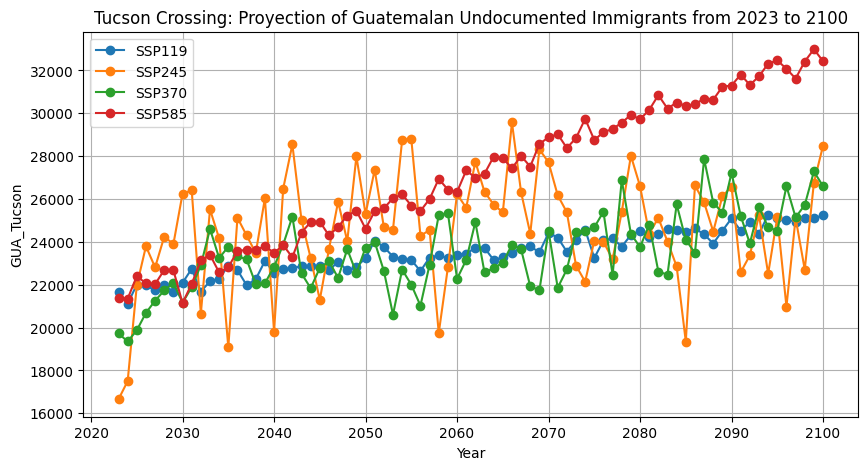

In [30]:
# Setting the index of all DataFrames to 'Year'
final_predictions_2023_2100_ssp119_GUA.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp245_GUA.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp370_GUA.set_index('Year', inplace=True)
final_predictions_2023_2100_ssp585_GUA.set_index('Year', inplace=True)
###########
# Plotting
plt.figure(figsize=(10, 5))  # You can adjust the figure size as needed
for ssp, label in zip([final_predictions_2023_2100_ssp119_GUA, final_predictions_2023_2100_ssp245_GUA, final_predictions_2023_2100_ssp370_GUA, final_predictions_2023_2100_ssp585_GUA], ['SSP119', 'SSP245', 'SSP370', 'SSP585']):
    plt.plot(ssp.index, ssp['GUA_Tucson'], marker='o', linestyle='-', label=label)
###########
plt.title('Tucson Crossing: Proyection of Guatemalan Undocumented Immigrants from 2023 to 2100')
plt.xlabel('Year')
plt.ylabel('GUA_Tucson')
plt.grid(True)
plt.legend()

plt.savefig("All_outputs/Guatemala/Tucson_GUA_All_Projections.png")

plt.show()

In [31]:
# Function to extract data for each scenario
def extract_data(final_predictions, scenario):
    return pd.DataFrame({
        'Scenario': [scenario] * len(final_predictions),
        'Year': final_predictions.index,
        'Number_of_People': final_predictions['GUA_Tucson']
    })
# Extract data for each scenario
data_ssp119_GUA = extract_data(final_predictions_2023_2100_ssp119_GUA, 'SSP119')
data_ssp245_GUA = extract_data(final_predictions_2023_2100_ssp245_GUA, 'SSP245')
data_ssp370_GUA = extract_data(final_predictions_2023_2100_ssp370_GUA, 'SSP370')
data_ssp585_GUA = extract_data(final_predictions_2023_2100_ssp585_GUA, 'SSP585')
# Concatenating all scenarios into a single DataFrame
output_df_GUA = pd.concat([data_ssp119_GUA, data_ssp245_GUA, data_ssp370_GUA, data_ssp585_GUA], ignore_index=True)
# Pivot the DataFrame
output_df_pivoted_GUA = output_df_GUA.pivot(index='Scenario', columns='Year', values='Number_of_People')
# Fill any missing values with 0
output_df_pivoted_GUA.fillna(0, inplace=True)

# Reformatting dataframe
output_df_pivoted_GUA.insert(0, 'Crossing', 'Tucson_Crossing')
output_df_pivoted_GUA.insert(1, 'Country', 'GUA')

# Saving dataframe

output_df_pivoted_GUA.to_csv("All_outputs/Guatemala/Tucson_GUA_4SSP.csv", index=True)

# Printing
output_df_pivoted_GUA

Year,Crossing,Country,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
Scenario,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
SSP119,Tucson_Crossing,GUA,21637.55,21115.38,22002.49,21977.44,21731.10,22009.72,21649.83,22092.17,22741.40,21682.22,22159.99,22286.84,22890.76,22683.64,21978.42,22257.92,23104.57,22564.36,22712.26,22768.41,22864.16,22872.25,22868.32,22667.04,23079.55,22665.73,22826.58,23245.39,24056.13,23766.47,23308.02,23183.27,23153.43,22638.26,23265.97,23371.67,23230.12,23391.97,23450.46,23720.62,23719.57,23154.04,23270.44,23499.70,23728.65,23786.88,23515.55,24418.03,24201.31,23541.36,24083.78,24573.10,23245.33,24072.97,24161.91,23778.95,24319.67,24515.16,24215.81,24372.96,24579.68,24557.44,24467.49,24625.04,24351.58,23922.40,24520.66,25095.47,24521.37,24927.90,24378.75,25263.59,25117.75,25037.46,24945.09,25093.60,25103.73,25239.25
SSP245,Tucson_Crossing,GUA,16656.38,17497.96,21965.18,23794.18,22810.57,24242.39,23899.01,26252.10,26403.68,20654.32,25514.37,24157.85,19077.71,25126.28,24301.74,23476.28,26033.16,19810.73,26486.51,28544.81,25019.85,23245.56,21295.71,23652.88,25880.50,24030.27,27996.15,25300.92,27368.17,24688.66,24575.49,28763.43,28796.91,24283.40,24551.83,19746.62,22814.31,26228.88,25589.64,27742.96,26332.65,25742.94,25374.43,29571.71,26309.59,24387.68,28315.55,27710.45,26174.08,25383.99,22896.30,22139.10,24059.70,24001.05,23188.22,25400.92,28017.44,26597.00,24387.14,25114.23,24015.54,22853.27,19348.76,26634.77,25841.60,24480.87,26131.80,26573.96,22580.40,23369.18,25256.18,22509.00,25150.71,20976.52,25114.81,22706.82,26755.55,28489.47
SSP370,Tucson_Crossing,GUA,19725.38,19350.48,19873.79,20685.49,21255.33,21731.57,22089.76,21160.64,21886.14,22915.96,24600.91,23243.75,23775.07,23329.53,23183.49,22029.71,22065.28,22837.76,23875.90,25181.19,22526.92,21838.95,22781.19,23099.80,22317.97,23660.68,22537.19,23731.67,23992.74,22647.99,20603.37,22706.72,21999.01,21023.58,22941.35,25250.04,25343.08,22275.78,23155.13,24924.54,22575.08,22765.20,23032.65,23871.01,23651.24,21925.52,21739.71,24502.88,21858.83,22713.20,24468.33,24529.95,24677.56,25406.23,22457.89,26883.19,24371.33,23752.54,24810.21,22615.02,22469.35,25752.77,24093.02,23480.39,27871.17,25820.75,25366.97,27228.62,25211.17,23924.77,25605.61,24687.43,24512.63,26597.34,25141.44,25719.43,27285.39,26598.45
SSP585,Tucson_Crossing,GUA,21393.20,21344.02,22402.58,22063.28,22030.19,22686.65,22671.97,21144.80,22042.77,23130.73,23397.52,22571.44,22813.83,23570.20,23629.43,23603.60,23812.25,23483.86,23846.57,23277.00,24430.03,24927.60,24943.75,24297.70,24700.37,25223.16,25455.01,24610.84,25427.26,25567.16,26036.35,26212.31,25694.56,25442.49,26001.77,26937.90,26436.99,26330.26,27333.55,26994.01,27180.32,27975.18,27904.89,27436.15,28004.44,27515.39,28571.57,28878.82,29021.70,28380.77,28841.78,29742.75,28750.36,29120.21,29266.94,29561.73,29926.25,29721.42,30158.51,30847.08,30222.81,30500.21,30348.41,30427.12,30682.20,30635.97,31240.10,31296.54,31809.29,31321.70,31725.15,32316.46,32467.33,32077.45,31621.45,32416.84,32990.14,32430.79


# Final Plots

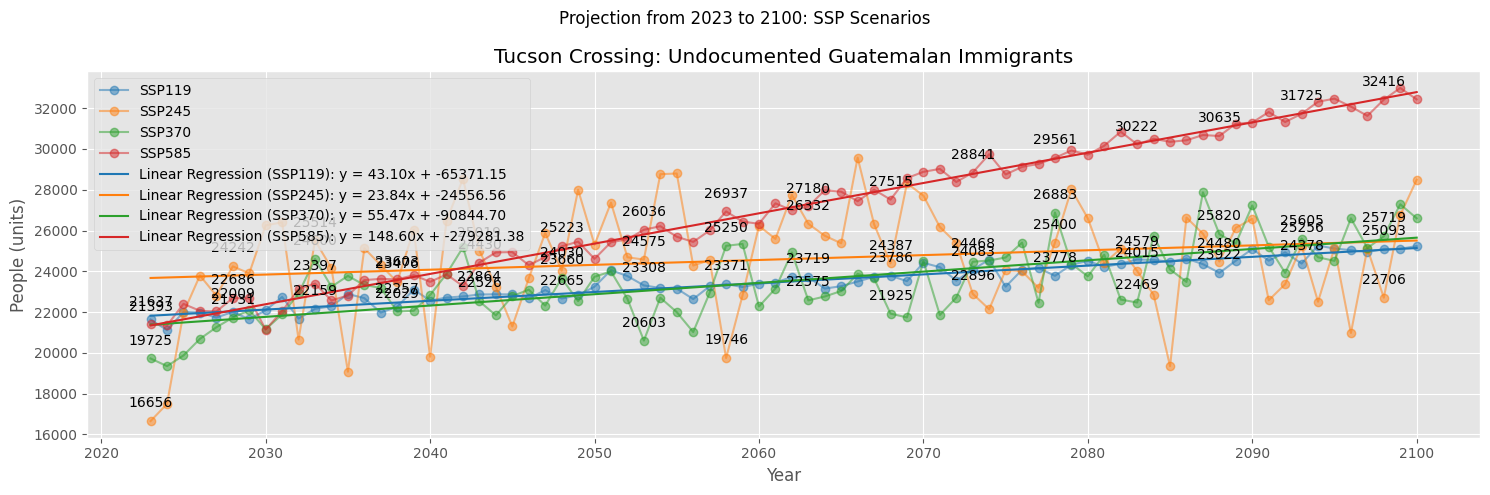

In [32]:
# Plotting results

##################################################################
# Using ggplot
plt.style.use('ggplot')
##################################################################
# Color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
##################################################################
# Plot size
plt.figure(figsize=(15, 5))  # You can adjust the figure size as needed
##################################################################
# Convert index values to strings
output_df_pivoted_GUA.index = output_df_pivoted_GUA.index.astype(str)
##################################################################
# Selecting every 5th year to display
years_to_display = output_df_pivoted_GUA.columns[2:][::5]  # Excluding first two columns
##################################################################
# Plotting data for each scenario
for scenario, color in zip(output_df_pivoted_GUA.index, colors):
    plt.plot(output_df_pivoted_GUA.columns[2:].astype(int), output_df_pivoted_GUA.loc[scenario][2:], marker='o', linestyle='-', alpha=0.5, label=scenario, color=color)
    for year in years_to_display:
        plt.annotate(f'{int(output_df_pivoted_GUA.loc[scenario, year])}', (int(year), output_df_pivoted_GUA.loc[scenario, year]), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('Tucson Crossing: Undocumented Guatemalan Immigrants')
plt.suptitle('Projection from 2023 to 2100: SSP Scenarios')
plt.xlabel('Year')
plt.ylabel('People (units)')
##################################################################
# Linear Regression Equation
X = output_df_pivoted_GUA.columns[2:].astype(int).values.reshape(-1, 1)
for scenario, color in zip(output_df_pivoted_GUA.index, colors):
    y = output_df_pivoted_GUA.loc[scenario][2:].values.reshape(-1, 1)
    model = LinearRegression().fit(X, y)
    m = model.coef_[0][0]
    b = model.intercept_[0]
    plt.plot(output_df_pivoted_GUA.columns[2:].astype(int), m * output_df_pivoted_GUA.columns[2:].astype(int) + b, label=f'Linear Regression ({scenario}): y = {m:.2f}x + {b:.2f}', color=color)
plt.grid(True)
plt.legend()
plt.tight_layout()
##################################################################

# Saving graph
plt.savefig("All_outputs/Guatemala/Tucson_GUA_4SSP_Single.png")

plt.show()